# **ESERCITAZIONE DI IDROLOGIA**

<div style=”border: 1px solid #000″>
    <img src="https://upload.wikimedia.org/wikipedia/it/e/e4/Sigillo_Universit%C3%A0_di_Trento.svg" width="80"
         style="float:left;margin: 10px"/><br>
    <p>DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA <br>
        CORSO DI LAUREA IN INGEGNERIA PER L'AMBIENTE E IL TERRITORIO <br>
        ANNO ACCADEMICO 2022-2023 </p>

</div><br>

    
    
*Studentesse*:  
Noemi Bando (201662)  
Anna Curti (211369)  
Elisabetta Sabbatini (209210)  


  
<div style="text-align: justify">
L'obiettivo della relazione consiste nell'indagare e commentare i risultati ottenuti dall'analisi del comportamento meccanico di un terreno durante il processo di infiltrazione, in risposta a diverse intensità di precipitazione. In particolare, si vuole determinare se specifiche condizioni di tessitura e geometria degli strati possono favorire lo sviluppo di un deflusso superficiale di tipo dunniano, caratterizzato dalla saturazione del suolo a partire dal basso, e si indaga il ruolo dell'argilla intermedia nella potenziale formazione di tale deflusso.  
Vengono considerati tre scenari di precipitazione differenti per valutare l'incidenza delle diverse condizioni meteorologiche sul comportamento idraulico del terreno.
<div>

## **Simulazione 1**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
from geoframepy.timeseries import io_csv
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import math
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')
nice_fonts = {"legend.frameon": True,"legend.fancybox": True,"legend.facecolor": "white","axes.edgecolor": "0.8",
            "axes.linewidth": 0.6,"grid.linewidth":0.4,"text.usetex": False,"font.family": "sans-serif",
            "axes.labelsize": 12,"font.size": 12,"legend.fontsize": 10,"xtick.labelsize": 10,"ytick.labelsize": 10,}
plt.rcParams.update(nice_fonts)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])

project_path = os.path.dirname(os.getcwd())
os.chdir(project_path+'/output')
ds1A = xr.open_dataset("prova1A_0000.nc")
ds1A=xr.open_dataset("prova1_0000.nc")

- Il terreno da noi scelto è composto da **quattro strati**: il più spesso e superficiale di sabbia, il secondo semi-impermeabile composto da limo argilloso-sabbioso, un terzo più spesso e dalla tessitura intermedia di limo sabbioso, ed infine uno strato più sottile di argilla limosa che permette di impermeabilizzare un suolo in cui si sono imposte delle condizioni di drenaggio libero sul fondo. Infine si ricorda che si sono imposte delle **condizioni idrostatiche** per cui la falda si trova sul fondo. 
- Per le precipitazioni vengono utilizzati dati riferiti ad un intervallo temporale di dieci giorni, in cui si sono verificate **piogge deboli** con un'intensità media di precipitazione di appena 0.33  mm/h, ovvero di circa 8 mm/die, caratterizzate da tre picchi più intensi.


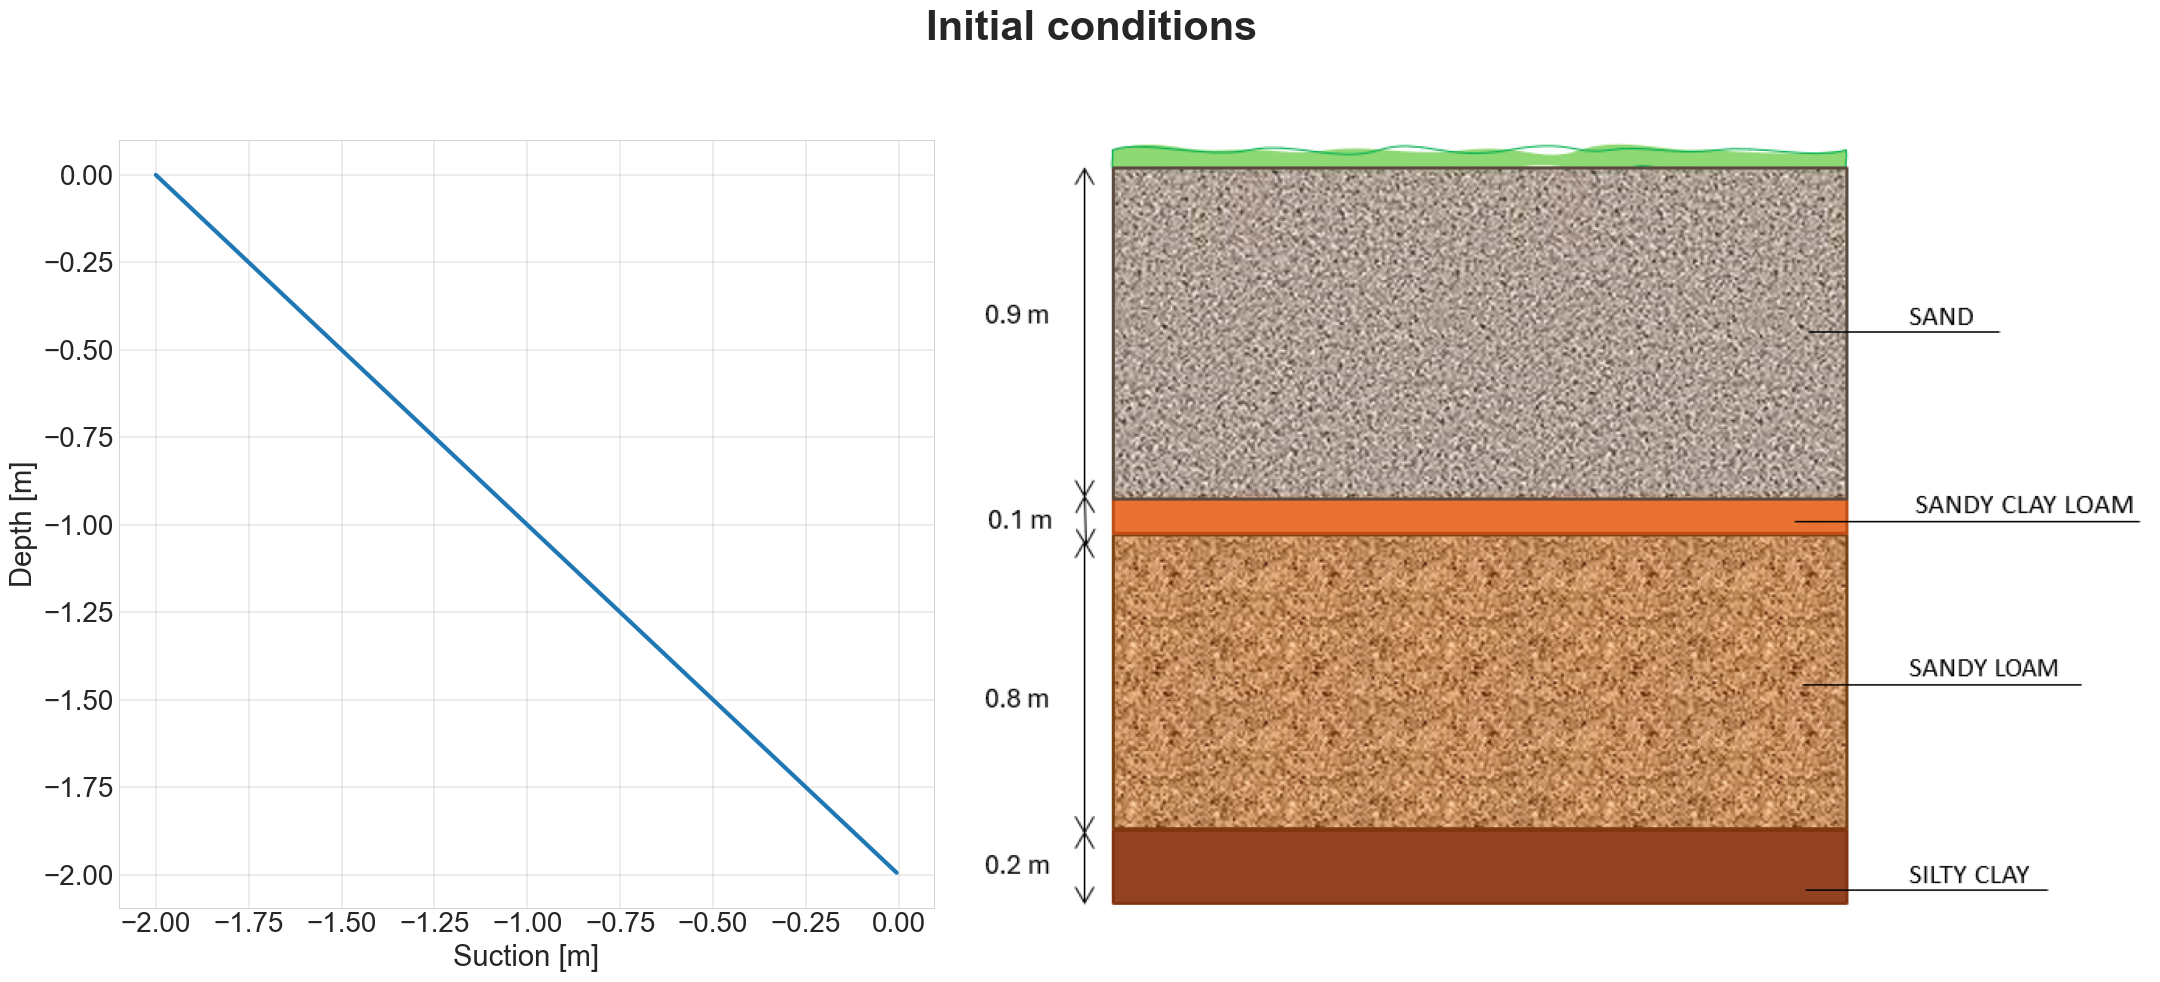

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = "C:/Users/bando/Pictures/Screenshots/grid3.png"
img = mpimg.imread(img_path)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 10), gridspec_kw={'width_ratios': [1, 1.5]})
ds1A.psiIC.plot(y='depth', ax=ax[0], linewidth=3)
ax[0].set_xlabel('Suction [m]', fontsize=21)
ax[0].set_ylabel('Depth [m]', fontsize=21)
ax[0].grid(color='black', linestyle='-', linewidth=0.1)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].imshow(img)
ax[1].axis('off')
plt.tight_layout()

fig.suptitle("Initial conditions", fontweight = "bold", fontsize=30)
fig.subplots_adjust(top=0.85)
plt.show()

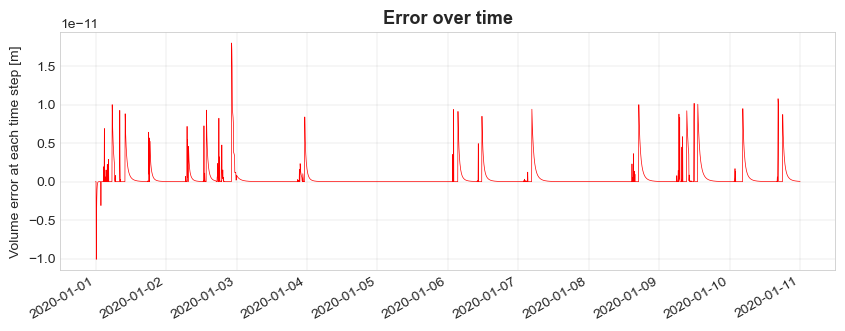

In [3]:
fig = plt.figure(figsize=(10,5/1.618))
ax = ds1A.error.plot(linewidth=0.5, color='red')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]', fontsize=10) 
plt.title('Error over time',fontweight = "bold", fontsize= 13)
plt.grid(color='grey', linestyle='-', linewidth=0.1)

Si analizzano gli sviluppi temporali nel contenuto d'acqua e nella suzione della colonna di suolo in funzione della profondità. 

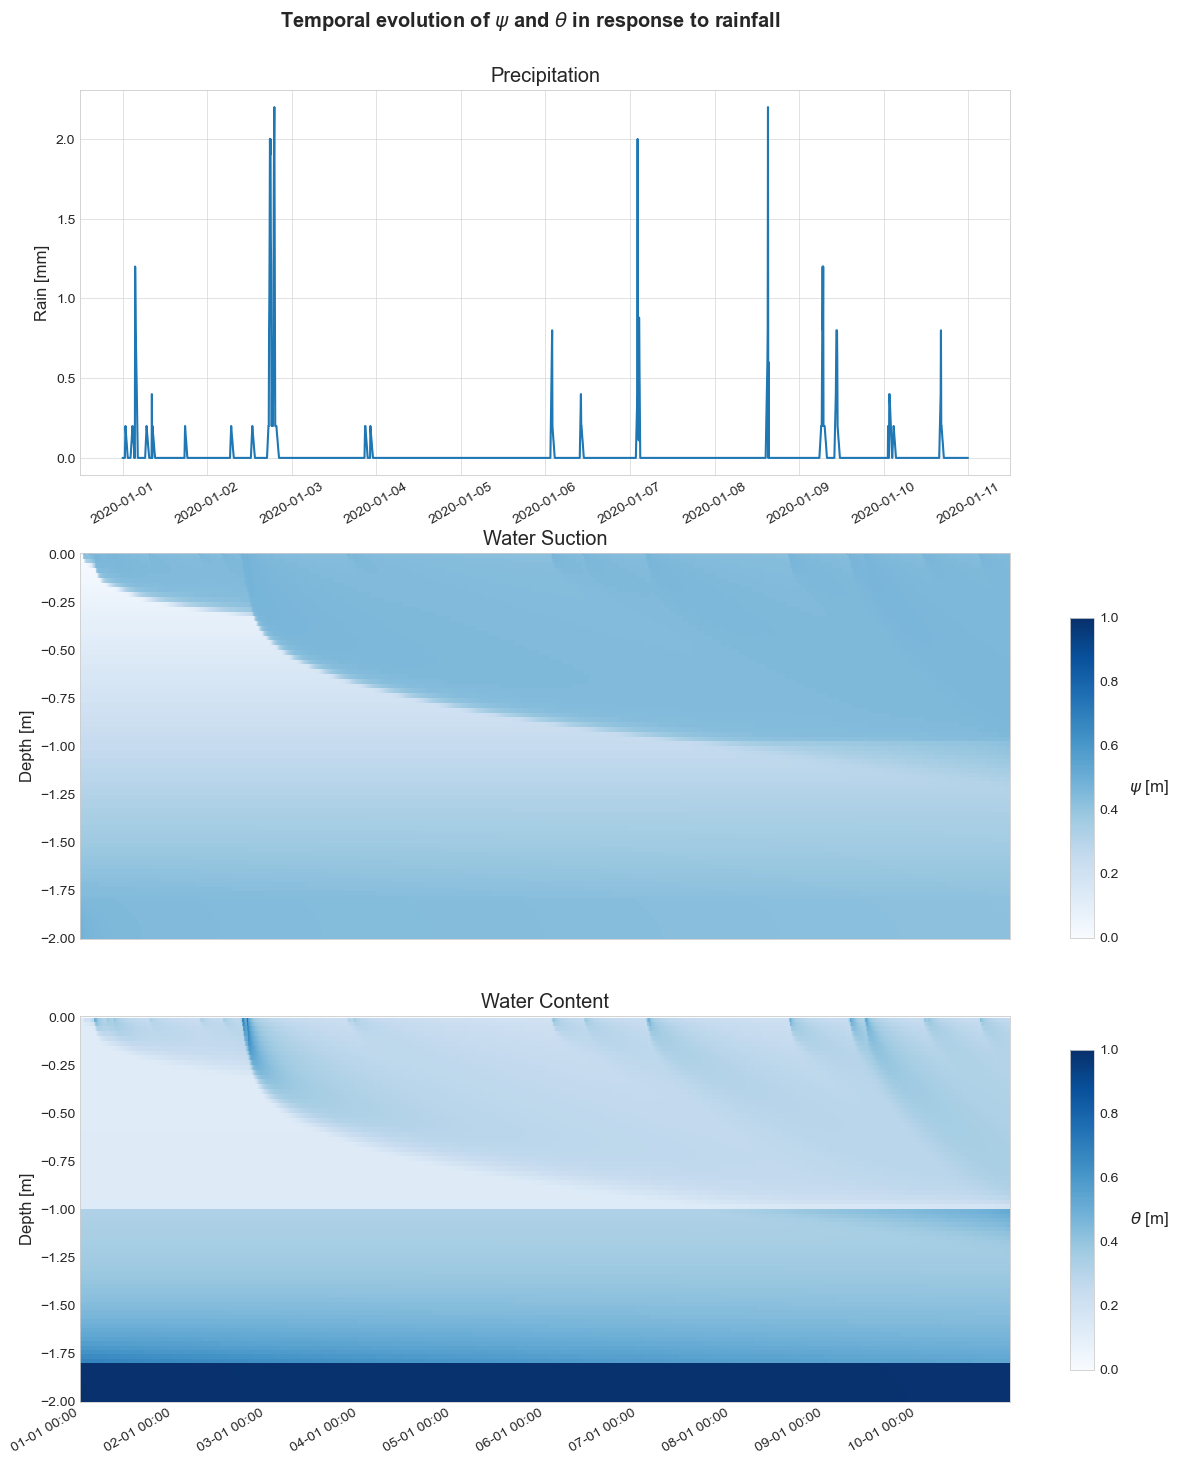

In [4]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/ex_rainfall.csv',datetime_index=False)
rain.head()

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 16)) 

ax[0].plot(ds1A.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]')
ax[0].set_title('Precipitation')
ax[0].xaxis.set_tick_params(rotation=30)


ds1A.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap='Blues')
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('')
ax[1].set_title('Water Suction')
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

cbar_ax1 = fig.add_axes([0.95, 0.40, 0.02, 0.20])
sm1 = plt.cm.ScalarMappable(cmap='Blues')
cbar1 = fig.colorbar(sm1, cax=cbar_ax1)
cbar1.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

ds1A.theta.plot(ax=ax[2], y='depth', add_colorbar=False, cmap='Blues')
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('')
ax[2].set_title('Water Content')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[2].xaxis.set_tick_params(rotation=30)

cbar_ax2 = fig.add_axes([0.95, 0.13, 0.02, 0.20])
sm2 = plt.cm.ScalarMappable(cmap='Blues')
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.set_label('$\\theta$ [m]', rotation=0, labelpad=22)

fig.suptitle("Temporal evolution of $\\psi$ and $\\theta$ in response to rainfall", fontweight = "bold")
fig.subplots_adjust(top=0.93)
plt.show()

  
  
Dato che le precipitazioni sono deboli ed i picchi relativamente contenuti, l'acqua che drena attraverso lo strato di sabbia non satura il suolo: per questo motivo lo strato di limo semi-impermeabile, che potrebbe facilitare il fenomeno di deflusso dal basso, non ha alcuna significante influenza sul modello. 

Dai grafici sottostanti si nota che mentre a piccole profondità il suolo risente repentinamente dei picchi di precipitazione, per profondità maggiori la variazione è ridotta e, soprattutto, la scarsa intensità di precipitazione fa sì che sia sopra che sotto allo strato di limo la variazione si verifichi dopo tempi prolungati.

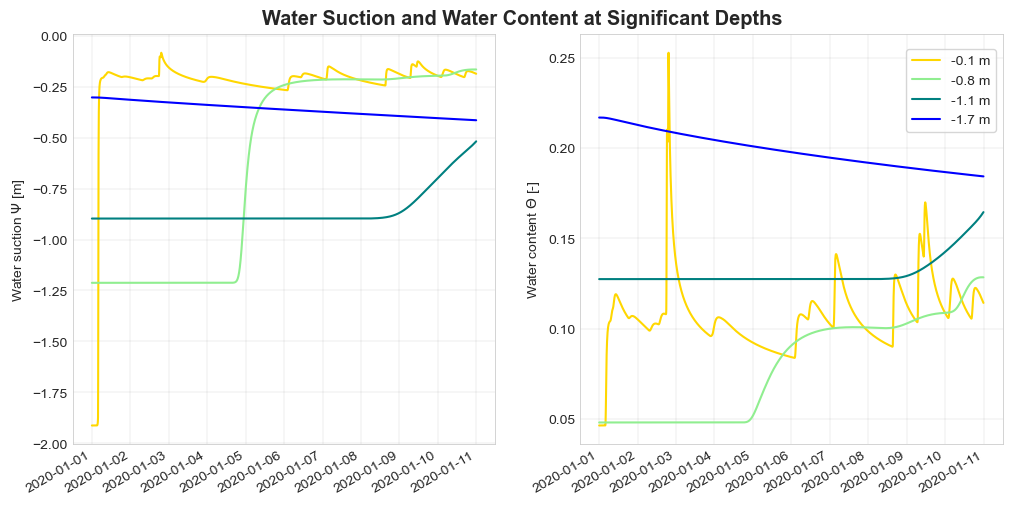

In [5]:
myDepth = [-0.1,-0.8,-1.1,-1.7]
colors = ['gold','lightgreen', 'teal', 'blue']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) 

for i in range(0, len(myDepth)):
    ds1A.psi.sel(depth=myDepth[i], method='nearest', time=ds1A.time.values[:]).plot(linewidth=1.5, label=str(myDepth[i])+' m',
                                                                                color=colors[i], ax=ax[0])
    ds1A.theta.sel(depth=myDepth[i], method='nearest', time=ds1A.time.values[:]).plot(linewidth=1.5, label=str(myDepth[i])+' m',
                                                                                  color=colors[i], ax=ax[1])

ax[0].set_ylabel('Water suction $\\Psi$ [m]', fontsize=10)
ax[0].set_xlabel('')
ax[0].set_title('')
ax[0].grid(color='grey', linestyle='-', linewidth=0.1)

ax[1].set_ylabel('Water content $\\Theta$ [-]', fontsize=10)
ax[1].set_xlabel('')
ax[1].set_title('')
ax[1].legend(bbox_to_anchor=(1,0.98))
ax[1].grid(color='grey', linestyle='-', linewidth=0.1)

fig.suptitle("Water Suction and Water Content at Significant Depths", fontweight = "bold")
fig.subplots_adjust(top=0.93)
plt.show()

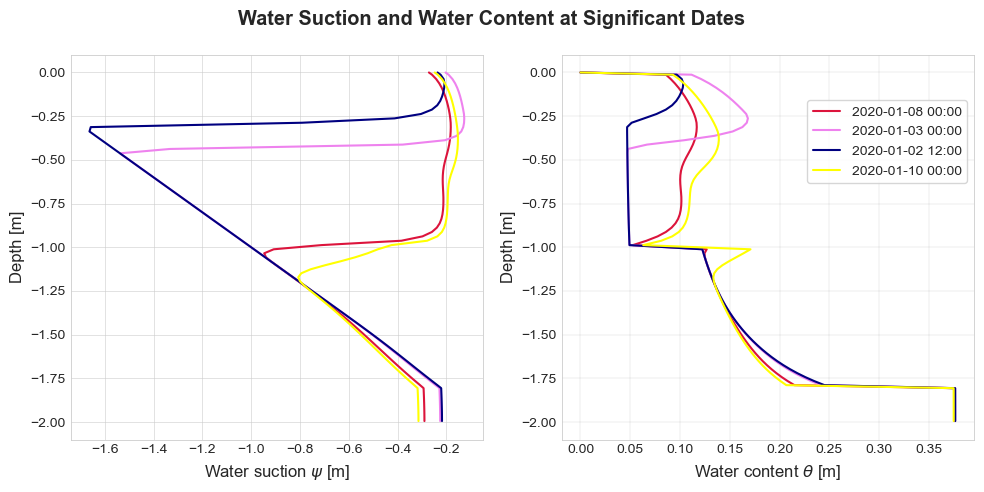

In [6]:
myDate = ['2020-01-08 00:00','2020-01-03 00:00','2020-01-02 12:00', '2020-01-10 00:00']
colors = ['crimson', 'violet', 'navy', 'yellow']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

for i in range (0,len(myDate)):
    ds1A.psi.sel(time=myDate[i]).plot(y='depth', linewidth=1.5, label=myDate[i],ax =ax[0], color=colors[i])
    ds1A.theta.sel(time=myDate[i]).plot(y='depth', linewidth=1.5, label=myDate[i],ax =ax[1], color=colors[i])

ax[0].set_xlabel('Water suction $\\psi$ [m]')
ax[0].set_ylabel('Depth [m]')
ax[0].set_title('')
ax[0].set_ylim(-2.1, 0.1)

ax[1].set_xlabel('Water content $\\theta$ [m]')
ax[1].set_ylabel('Depth [m]')
ax[1].set_title('')
ax[1].set_ylim(-2.1, 0.1)

fig.suptitle('Water Suction and Water Content at Significant Dates', fontweight='bold')
plt.legend(bbox_to_anchor=(1,0.9))
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.tight_layout()

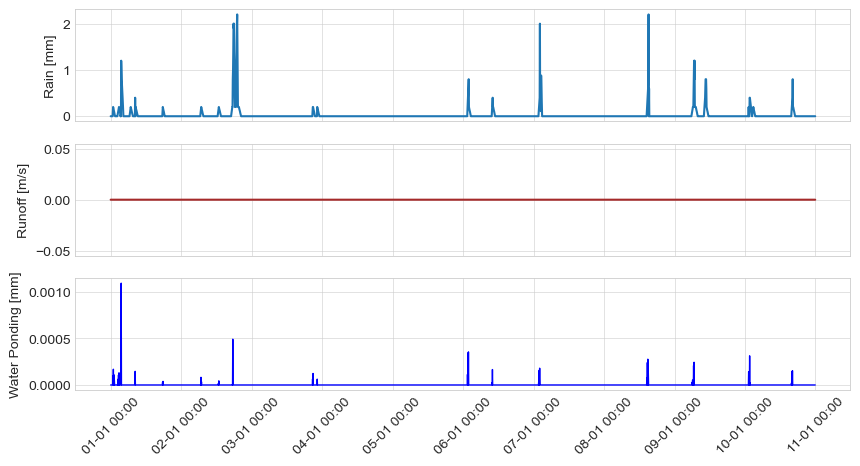

In [7]:
fig, ax = plt.subplots(3, 1, sharex='col', figsize=(10, 8/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds1A.psi.values), vmax=np.amax(ds1A.psi.values))

ax[0].plot(ds1A.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]', fontsize=10)
#a = ds1A.runOff.sel(time=ds1A.time.values[:]).plot(linewidth=1,color='brown')
ax[1].plot(ds1A.time.values, ds1A.runOff.values, color='brown')
ax[1].set_ylabel('Runoff [m/s]', fontsize=10)
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[2].xaxis.set_tick_params(rotation=45, labelsize=10)
ax[2].plot(ds1A.time.values, ds1A.waterVolume.sel(depth=0), color='blue', linewidth=1)
ax[2].set_ylabel('Water Ponding [mm]', fontsize=10)

plt.show()

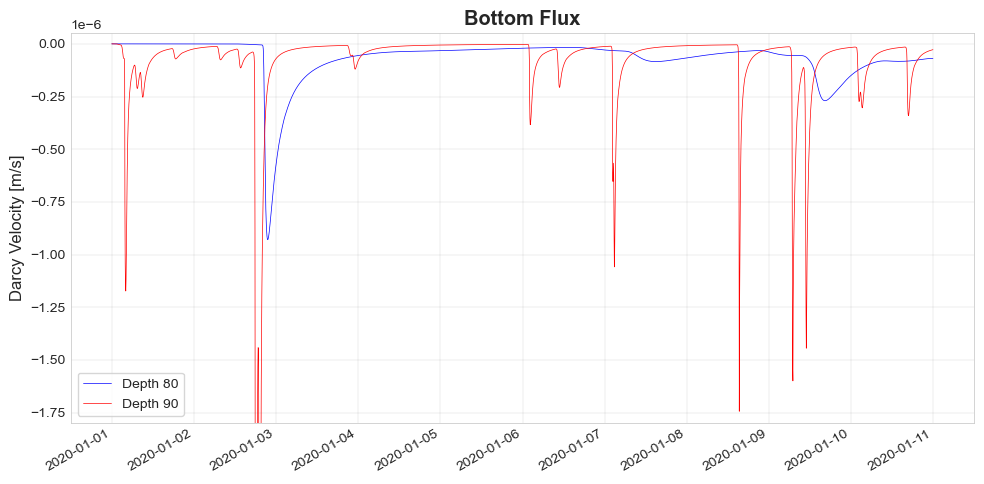

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
ds1A.darcyVelocity.sel(dualDepth=ds1A.dualDepth[80], time=ds1A.time.values[:]).plot(linewidth=0.5, color='blue',
                                                                                    label='Depth 80', ax=ax)
ds1A.darcyVelocity.sel(dualDepth=ds1A.dualDepth[90], time=ds1A.time.values[:]).plot(linewidth=0.5, color='red',
                                                                                label='Depth 90', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Darcy Velocity [m/s]')
ax.set_title('Bottom Flux', fontweight='bold')
ax.set_ylim(-0.0000018, 0.00000005)

plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.legend()
plt.tight_layout()
plt.show()

## **Simulazione 2**


- Il suolo ha geometria e condizioni iniziali pari al precedente.
- Eventi di precipitazione riferiti all'**alluvione** avvenuta a **Forlì** nel mese di maggio 2023: l'intervallo temporale considerato nella simulazione è di 11 giorni, durante i quali si sono verificate precipitazioni molto intense con picchi oltre i 35 mm e con una intensità media pari a 8 mm/h.

In [9]:
project_path = os.path.dirname(os.getcwd())
os.chdir(project_path+'/output')
ds3A = xr.open_dataset("prova3A_0000.nc")

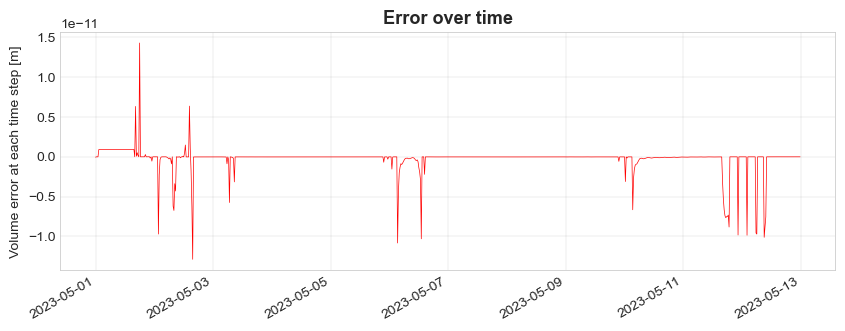

In [10]:
fig = plt.figure(figsize=(10,5/1.618))
ax = ds3A.error.plot(linewidth=0.5, color='red')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]', fontsize=10) 
plt.title('Error over time',fontweight = "bold", fontsize= 13)
plt.grid(color='grey', linestyle='-', linewidth=0.1)

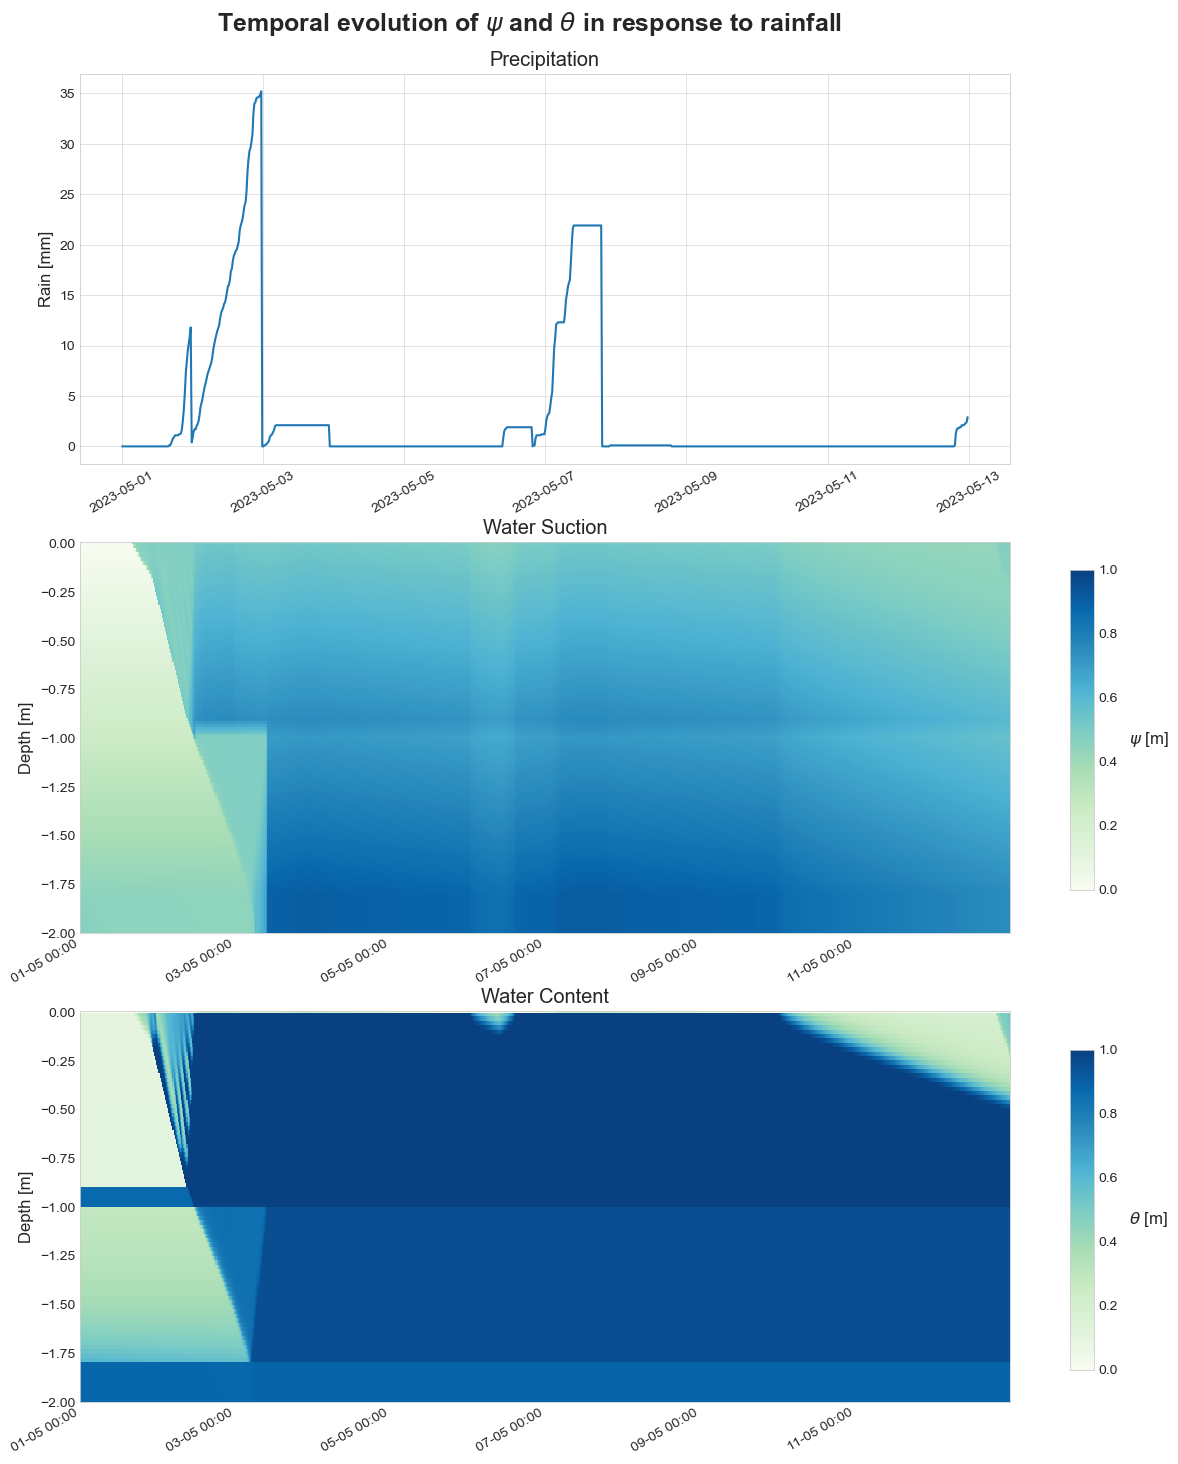

In [11]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/3_precipEstreme_Forli.csv',datetime_index=False)
rain.head()
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 16)) 

ax[0].plot(ds3A.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]')
ax[0].set_title('Precipitation')
ax[0].xaxis.set_tick_params(rotation=30)

ds3A.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap='GnBu')
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('')
ax[1].set_title('Water Suction')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[1].xaxis.set_tick_params(rotation=30)
cbar_ax1 = fig.add_axes([0.95, 0.43, 0.02, 0.20])
sm1 = plt.cm.ScalarMappable(cmap='GnBu')
cbar1 = fig.colorbar(sm1, cax=cbar_ax1)
cbar1.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

ds3A.theta.plot(ax=ax[2], y='depth', add_colorbar=False, cmap='GnBu')
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('')
ax[2].set_title('Water Content')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[2].xaxis.set_tick_params(rotation=30)
cbar_ax2 = fig.add_axes([0.95, 0.13, 0.02, 0.20])
sm2 = plt.cm.ScalarMappable(cmap='GnBu')
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.set_label('$\\theta$ [m]', rotation=0, labelpad=22)

fig.suptitle("Temporal evolution of $\\psi$ and $\\theta$ in response to rainfall", fontweight = "bold", fontsize=18)
fig.subplots_adjust(top=0.94)
plt.show()

<div style="text-align: justify">
In questo caso si vede come il <b>sottile strato di argilla intermedio</b> risulti importante ai fini della simulazione: questo infatti amplifica l'effetto dovuto all'abbondanza di precipitazioni, rallentando il drenaggio dell'acqua allo strato sottostante e comportandosi come un <b>ostacolo impermeabile</b>, facendo risalire verso la superficie l'acqua piovana accumulatasi.
Si può inoltre osservare che, a causa della forte intensità dei due principali picchi di precipitazione, l'effetto di <b>saturazione</b> sia repentino non soltanto per il terreno più superficiale, bensì per tutta la colonna di suolo; basti osservare che il primo metro di suolo giunge a completa saturazione dopo meno di due giorni dall'inizio della prova.
<div>

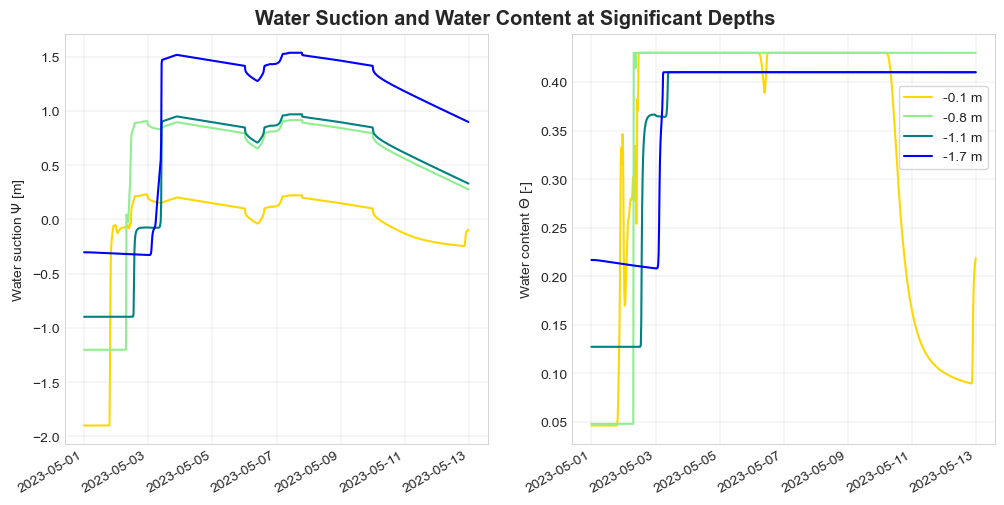

In [12]:
myDepth = [-0.1,-0.8,-1.1,-1.7]
colors = ['gold','lightgreen', 'teal', 'blue']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) 

for i in range(0, len(myDepth)):
    ds3A.psi.sel(depth=myDepth[i], method='nearest', time=ds3A.time.values[:]).plot(linewidth=1.5, label=str(myDepth[i])+' m',
                                                                                color=colors[i], ax=ax[0])
    ds3A.theta.sel(depth=myDepth[i], method='nearest', time=ds3A.time.values[:]).plot(linewidth=1.5, label=str(myDepth[i])+' m',
                                                                                  color=colors[i], ax=ax[1])

ax[0].set_ylabel('Water suction $\\Psi$ [m]', fontsize=10)
ax[0].set_xlabel('')
ax[0].set_title('')
ax[0].grid(color='grey', linestyle='-', linewidth=0.1)

ax[1].set_ylabel('Water content $\\Theta$ [-]', fontsize=10)
ax[1].set_xlabel('')
ax[1].set_title('')
ax[1].legend(bbox_to_anchor=(1,0.89))
ax[1].grid(color='grey', linestyle='-', linewidth=0.1)

fig.suptitle("Water Suction and Water Content at Significant Depths", fontweight = "bold")
fig.subplots_adjust(top=0.93)
plt.show()

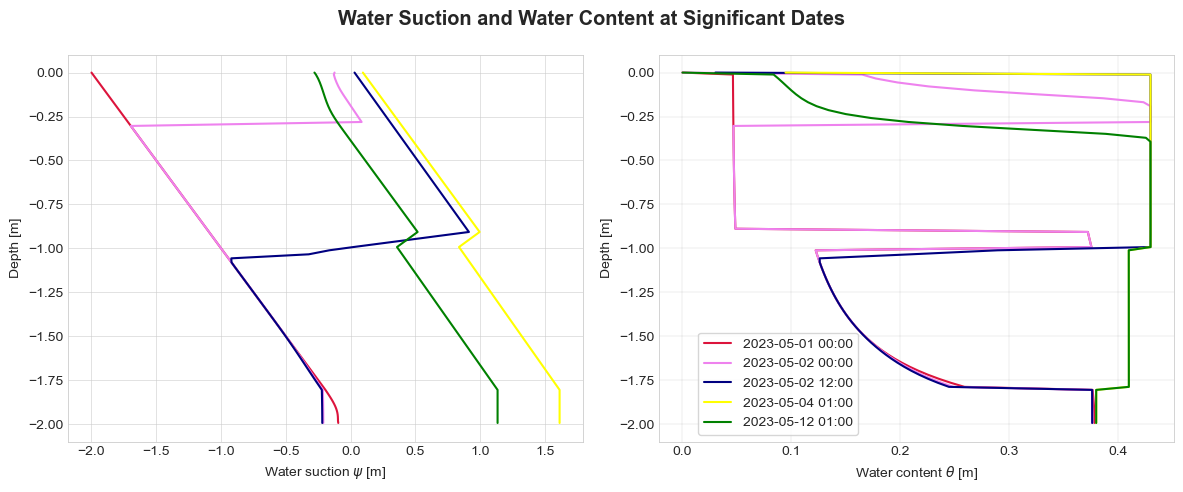

In [13]:
myDate = ['2023-05-01 00:00','2023-05-02 00:00', '2023-05-02 12:00','2023-05-04 01:00', '2023-05-12 01:00']
colors = ['crimson', 'violet', 'navy', 'yellow', 'green']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) 

for i in range (0,len(myDate)):
    ds3A.psi.sel(time=myDate[i]).plot(y='depth', linewidth=1.5, label=myDate[i],ax =ax[0], color=colors[i])
    ds3A.theta.sel(time=myDate[i]).plot(y='depth', linewidth=1.5, label=myDate[i],ax =ax[1], color=colors[i])

ax[0].set_xlabel('Water suction $\\psi$ [m]', fontsize=10)
ax[0].set_ylabel('Depth [m]', fontsize=10)
ax[0].set_title('')
ax[0].set_ylim(-2.1, 0.1)

ax[1].set_xlabel('Water content $\\theta$ [m]', fontsize=10)
ax[1].set_ylabel('Depth [m]', fontsize=10)
ax[1].set_title('')
ax[1].set_ylim(-2.1, 0.1)

fig.suptitle('Water Suction and Water Content at Significant Dates', fontweight='bold')
plt.legend(bbox_to_anchor=(0.4,0.3))
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.tight_layout()

Il **runoff** è il flusso di acqua che si verifica sulla superficie del terreno ed è influenzato da vari fattori, tra cui la permeabilità del suolo, la pendenza del terreno, l'intensità e la durata delle precipitazioni. L'acqua può muoversi scorrendo e raggiungendo i corsi d'acqua superficiali oppure infiltrandosi nel terreno.  
Il **water ponding**, invece, si verifica quando l'acqua si accumula sulla superficie del terreno senza essere in grado di defluire o di infiltrarsi nel terreno.
Questo può accadere a causa di una serie di motivi, come terreno compatto o saturato d'acqua, scarsa pendenza del terreno o ostruzioni nel deflusso naturale dell'acqua. Il water ponding può portare a ristagni d'acqua che possono causare problemi come allagamenti, erosione del suolo e danni alle coltivazioni.

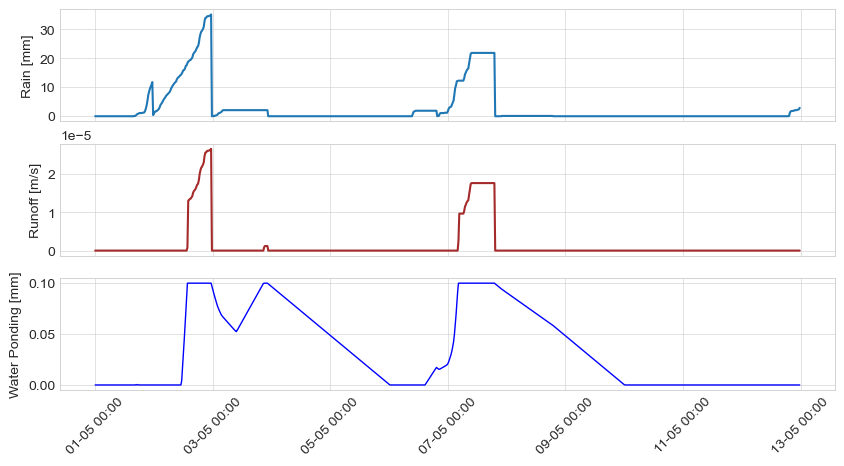

In [14]:
fig, ax = plt.subplots(3, 1, sharex='col', figsize=(10, 8/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds3A.psi.values), vmax=np.amax(ds3A.psi.values))

ax[0].plot(ds3A.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]', fontsize=10)
ax[1].plot(ds3A.time.values, ds3A.runOff.values, color='brown')
ax[1].set_ylabel('Runoff [m/s]', fontsize=10)
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[2].xaxis.set_tick_params(rotation=45, labelsize=10)
ax[2].plot(ds3A.time.values, ds3A.waterVolume.sel(depth=0), color='blue', linewidth=1)
ax[2].set_ylabel('Water Ponding [mm]', fontsize=10)

plt.show()

Si confrontano il valore della permeabilità del primo strato di suolo a saturazione con la precipitazione media durante l'intervallo d'analisi, per **stabilire se l'intensità di precipitazione supera la capacità di infiltrazione del suolo** e quindi se si verifica deflusso hortoniano.
- media di precipitazione: 2.35e-06 m/s
- Ks sabbia: 8.25e-05 m/s  

prec < Ks -->  **Non si verifica deflusso hortoniano.**

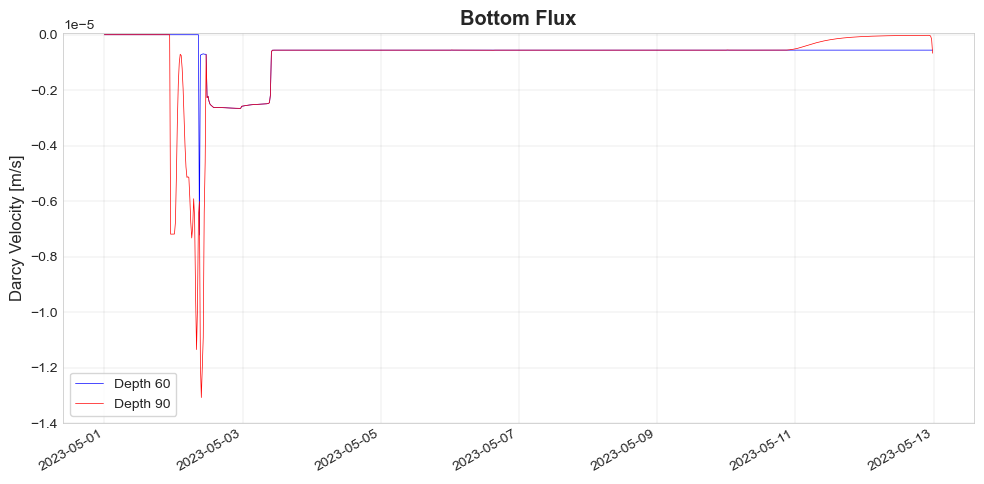

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ds3A.darcyVelocity.sel(dualDepth=ds3A.dualDepth[60], time=ds3A.time.values[:]).plot(linewidth=0.5, color='blue',
                                                                                    label='Depth 60', ax=ax)
ds3A.darcyVelocity.sel(dualDepth=ds3A.dualDepth[90], time=ds3A.time.values[:]).plot(linewidth=0.5, color='red',
                                                                                label='Depth 90', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Darcy Velocity [m/s]')
ax.set_title('Bottom Flux', fontweight='bold')
ax.set_ylim(-0.000014, 0.00000005)

plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.legend()
plt.tight_layout()
plt.show()

## **Simulazione 3**

In [16]:
project_path = os.path.dirname(os.getcwd())
os.chdir(project_path+'/output')
ds3 = xr.open_dataset("prova3_0000.nc")

- Stesse caratteristiche del suolo ma **senza lo strato intermedio di argilla**
- Stessi dati di precipitazione della simulazione 2 (**alluvione di Forlì**)

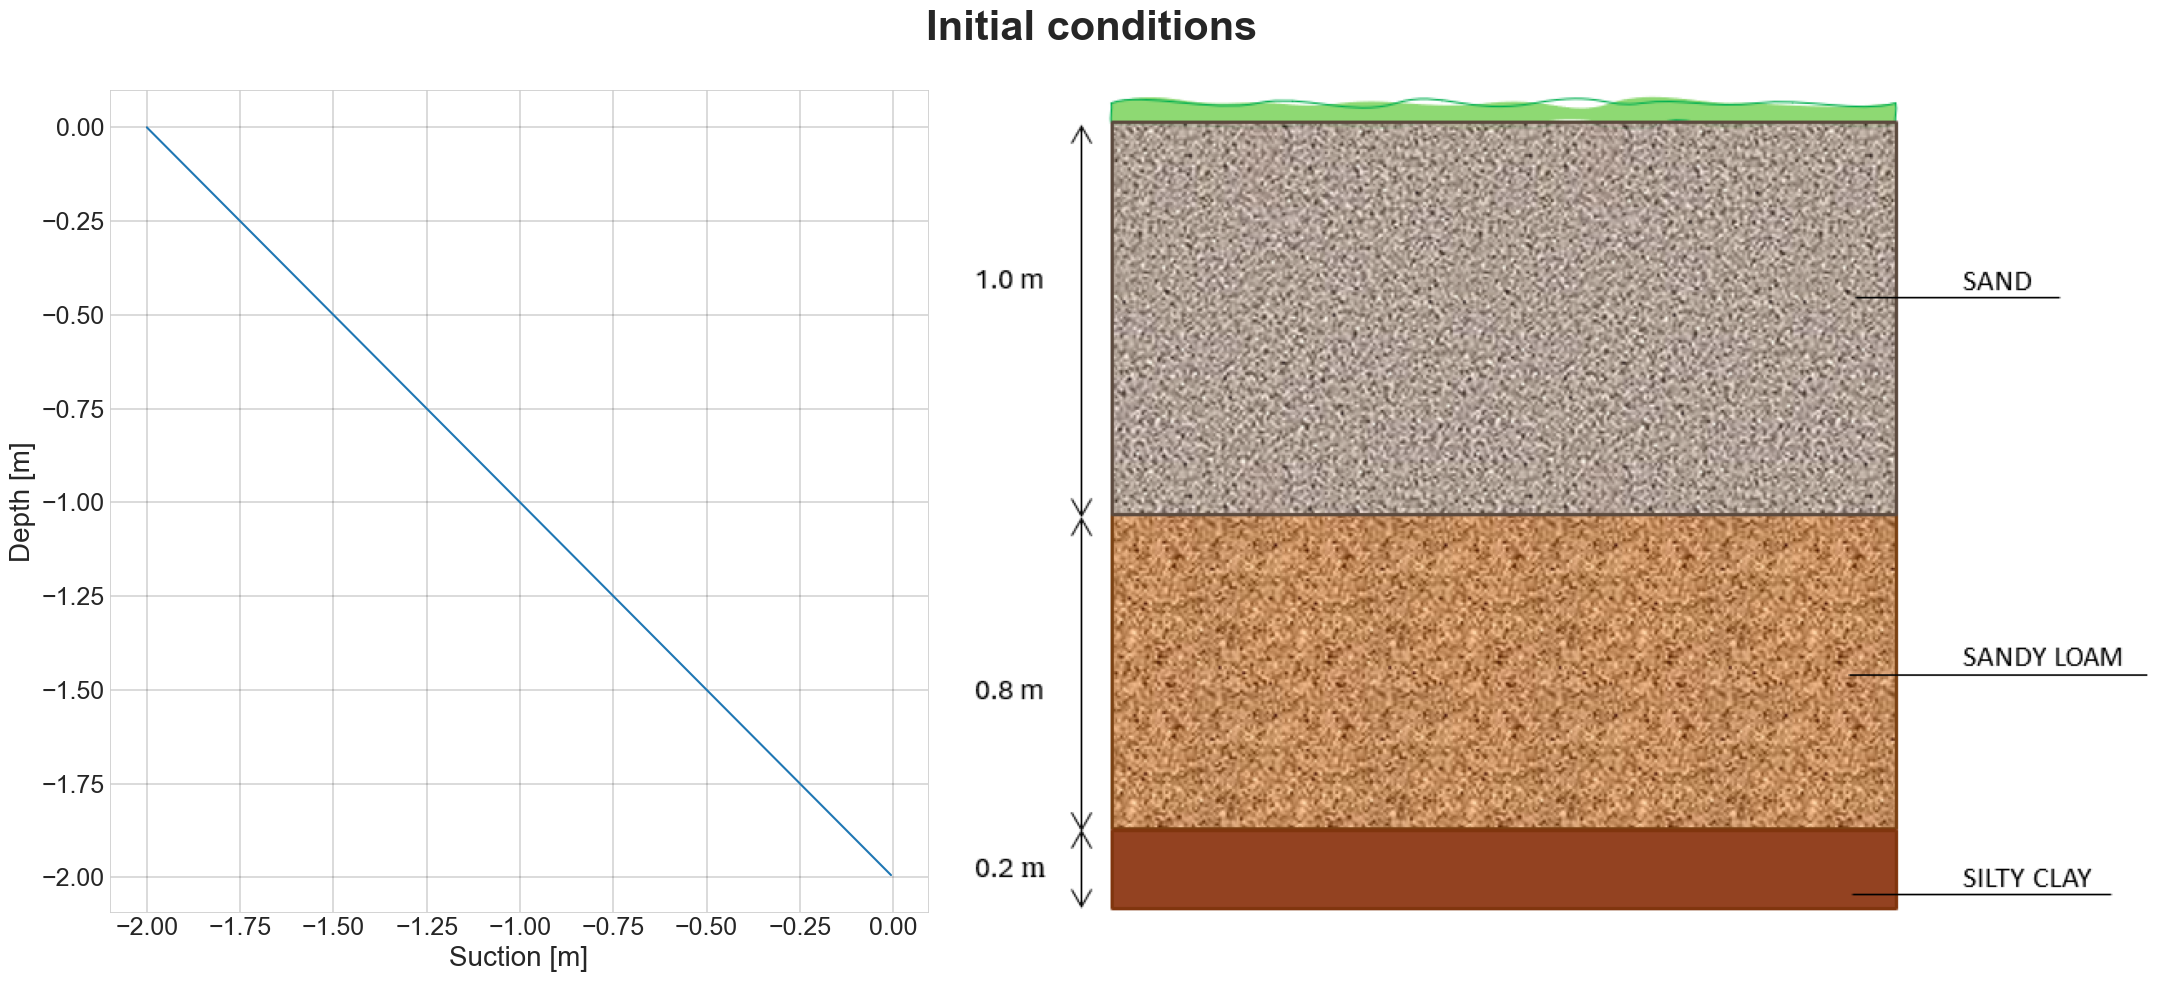

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = "C:/Users/bando/Pictures/Screenshots/grid4.png"
img = mpimg.imread(img_path)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 10), gridspec_kw={'width_ratios': [1, 1.5]})
ds3.psiIC.plot(y='depth', ax=ax[0])
ax[0].set_xlabel('Suction [m]', fontsize=20)
ax[0].set_ylabel('Depth [m]', fontsize=20)
ax[0].grid(color='black', linestyle='-', linewidth=0.2)
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].imshow(img)
ax[1].axis('off')
plt.tight_layout()

fig.suptitle("Initial conditions", fontweight = "bold", fontsize=30)
fig.subplots_adjust(top=0.9)
plt.show()

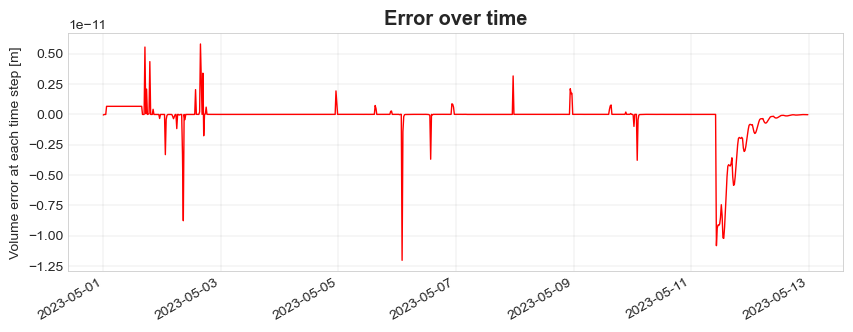

In [30]:
fig = plt.figure(figsize=(10,5/1.618))
ax = ds3.error.plot(linewidth=1, color='red')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]', fontsize=10) 
plt.title('Error over time', fontweight = "bold")
plt.grid(color='grey', linestyle='-', linewidth=0.1)

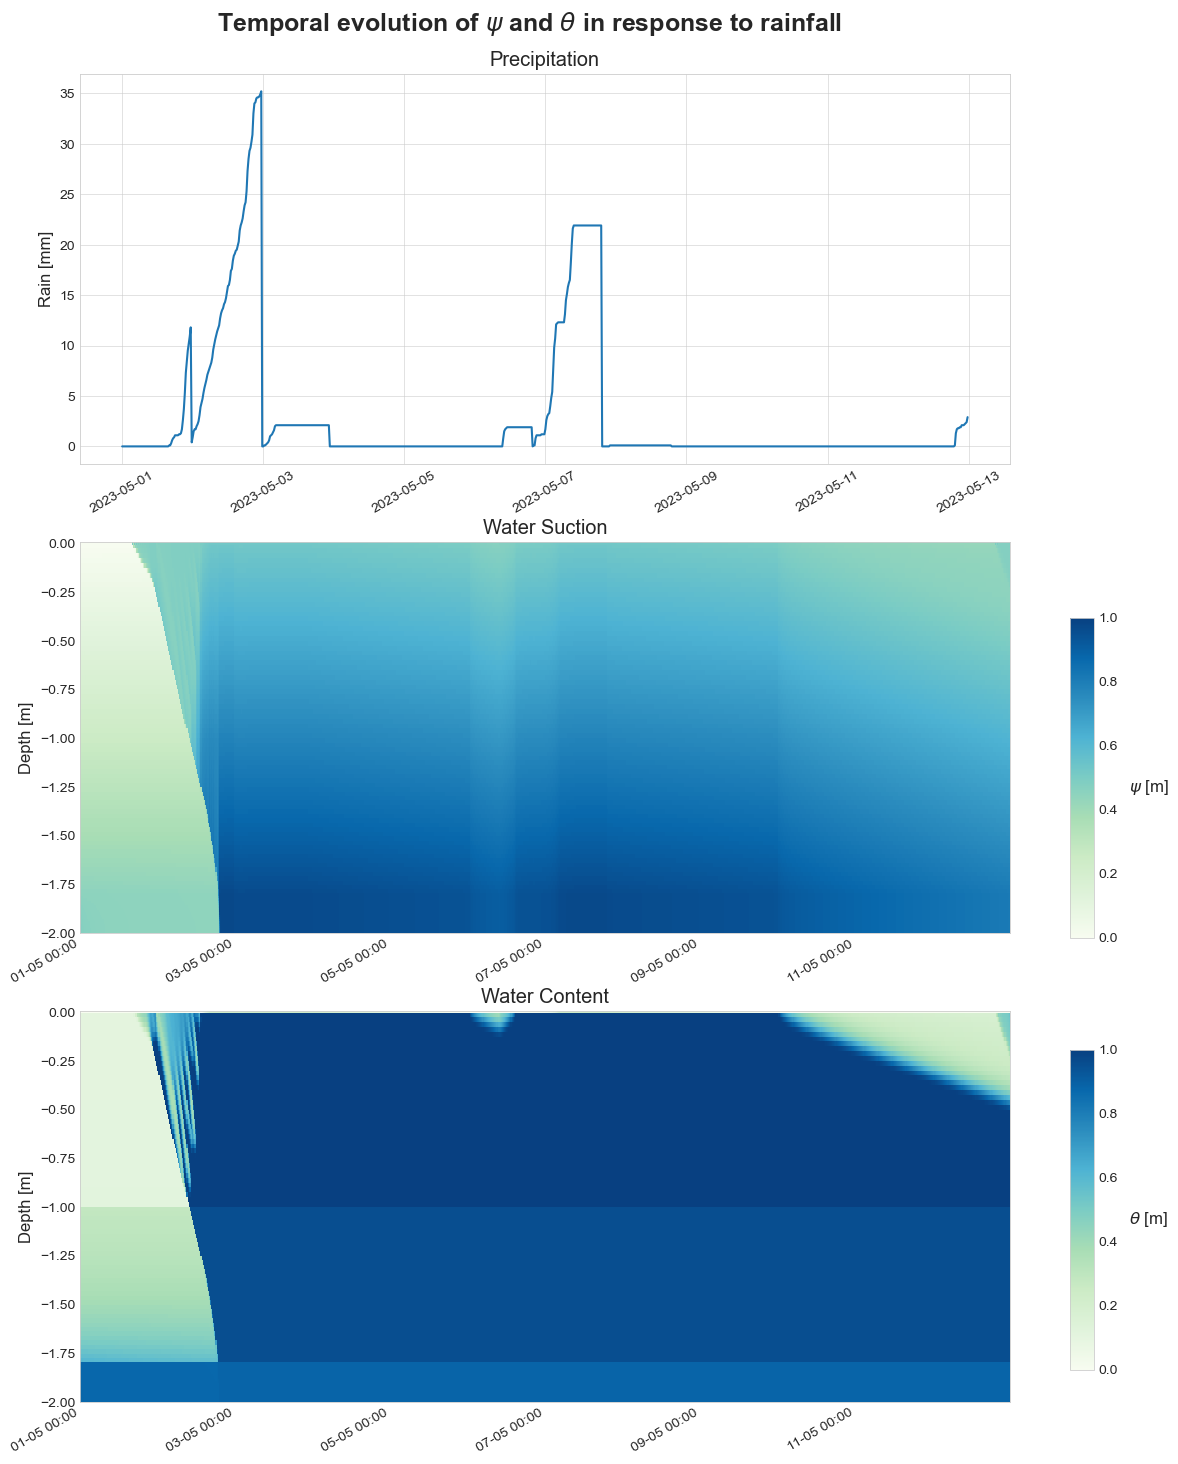

In [19]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/3_precipEstreme_Forli.csv',datetime_index=False)
rain.head()
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 16)) 

ax[0].plot(ds3.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]')
ax[0].set_title('Precipitation')
ax[0].xaxis.set_tick_params(rotation=30)

ds3.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap='GnBu')
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('')
ax[1].set_title('Water Suction')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[1].xaxis.set_tick_params(rotation=30)
cbar_ax1 = fig.add_axes([0.95, 0.40, 0.02, 0.20])
sm1 = plt.cm.ScalarMappable(cmap='GnBu')
cbar1 = fig.colorbar(sm1, cax=cbar_ax1)
cbar1.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

ds3.theta.plot(ax=ax[2], y='depth', add_colorbar=False, cmap='GnBu')
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('')
ax[2].set_title('Water Content')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[2].xaxis.set_tick_params(rotation=30)
cbar_ax2 = fig.add_axes([0.95, 0.13, 0.02, 0.20])
sm2 = plt.cm.ScalarMappable(cmap='GnBu')
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.set_label('$\\theta$ [m]', rotation=0, labelpad=22)

fig.suptitle("Temporal evolution of $\\psi$ and $\\theta$ in response to rainfall", fontweight = "bold", fontsize=18)
fig.subplots_adjust(top=0.94)
plt.show()

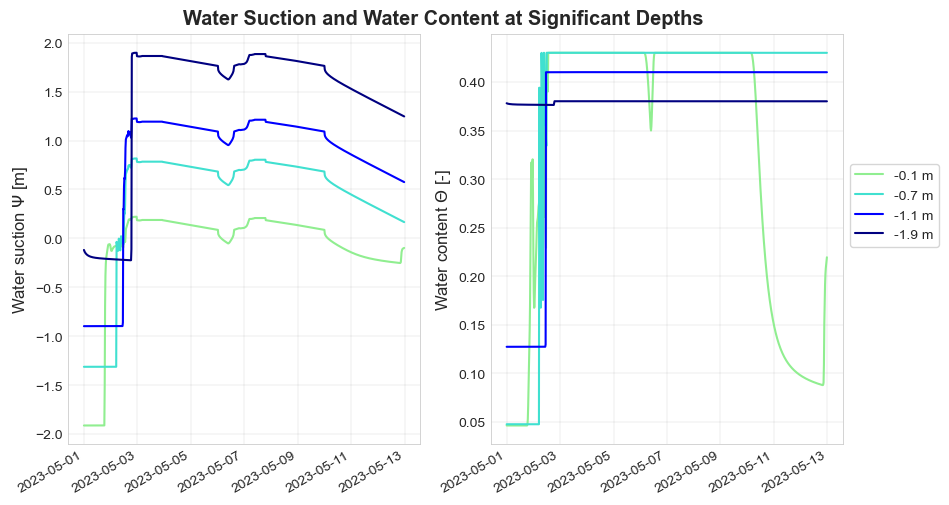

In [20]:
myDepth = [-0.1,-0.7,-1.1,-1.9]
colors = ['lightgreen', 'turquoise', 'blue', 'navy']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

for i in range(0, len(myDepth)):
    ds3.psi.sel(depth=myDepth[i], method='nearest', time=ds3.time.values[:]).plot(linewidth=1.5, label=str(myDepth[i])+' m',
                                                                                color=colors[i], ax=ax[0])
    ds3.theta.sel(depth=myDepth[i], method='nearest', time=ds3.time.values[:]).plot(linewidth=1.5, label=str(myDepth[i])+' m',
                                                                                  color=colors[i], ax=ax[1])

ax[0].set_ylabel('Water suction $\\Psi$ [m]')
ax[0].set_xlabel('')
ax[0].set_title('')
ax[0].grid(color='grey', linestyle='-', linewidth=0.1)

ax[1].set_ylabel('Water content $\\Theta$ [-]')
ax[1].set_xlabel('')
ax[1].set_title('')
ax[1].legend(bbox_to_anchor=(1,0.7))
ax[1].grid(color='grey', linestyle='-', linewidth=0.1)

fig.suptitle("Water Suction and Water Content at Significant Depths", fontweight = "bold")
fig.subplots_adjust(top=0.93)
plt.show()

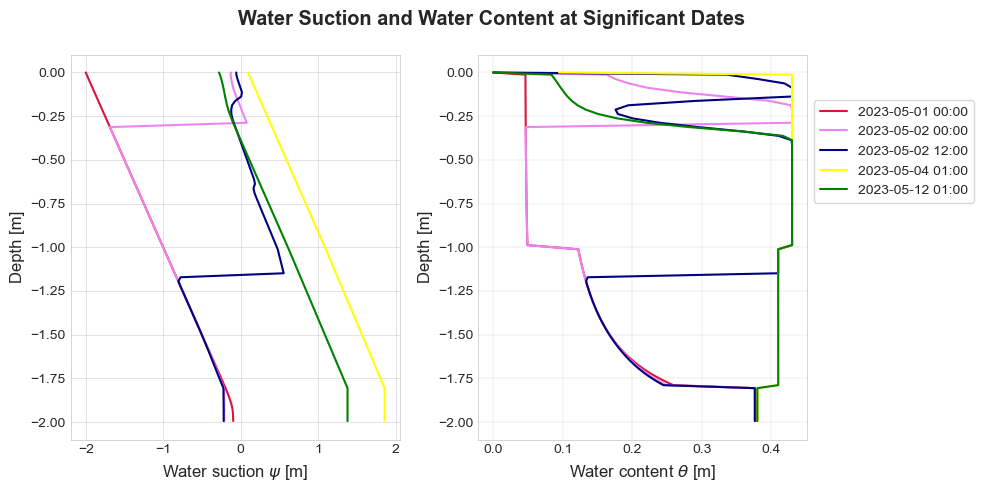

In [21]:
myDate = ['2023-05-01 00:00','2023-05-02 00:00', '2023-05-02 12:00','2023-05-04 01:00', '2023-05-12 01:00']
colors = ['crimson', 'violet', 'navy', 'yellow', 'green']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

for i in range (0,len(myDate)):
    ds3.psi.sel(time=myDate[i]).plot(y='depth', linewidth=1.5, label=myDate[i],ax =ax[0], color=colors[i])
    ds3.theta.sel(time=myDate[i]).plot(y='depth', linewidth=1.5, label=myDate[i],ax =ax[1], color=colors[i])

ax[0].set_xlabel('Water suction $\\psi$ [m]')
ax[0].set_ylabel('Depth [m]')
ax[0].set_title('')
ax[0].set_ylim(-2.1, 0.1)

ax[1].set_xlabel('Water content $\\theta$ [m]')
ax[1].set_ylabel('Depth [m]')
ax[1].set_title('')
ax[1].set_ylim(-2.1, 0.1)

fig.suptitle('Water Suction and Water Content at Significant Dates', fontweight='bold')
plt.legend(bbox_to_anchor=(1,0.9))
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.tight_layout()

## **Simulazione 4**

In [31]:
project_path = os.path.dirname(os.getcwd())
os.chdir(project_path+'/output')
ds2 = xr.open_dataset("prova2_0000.nc")

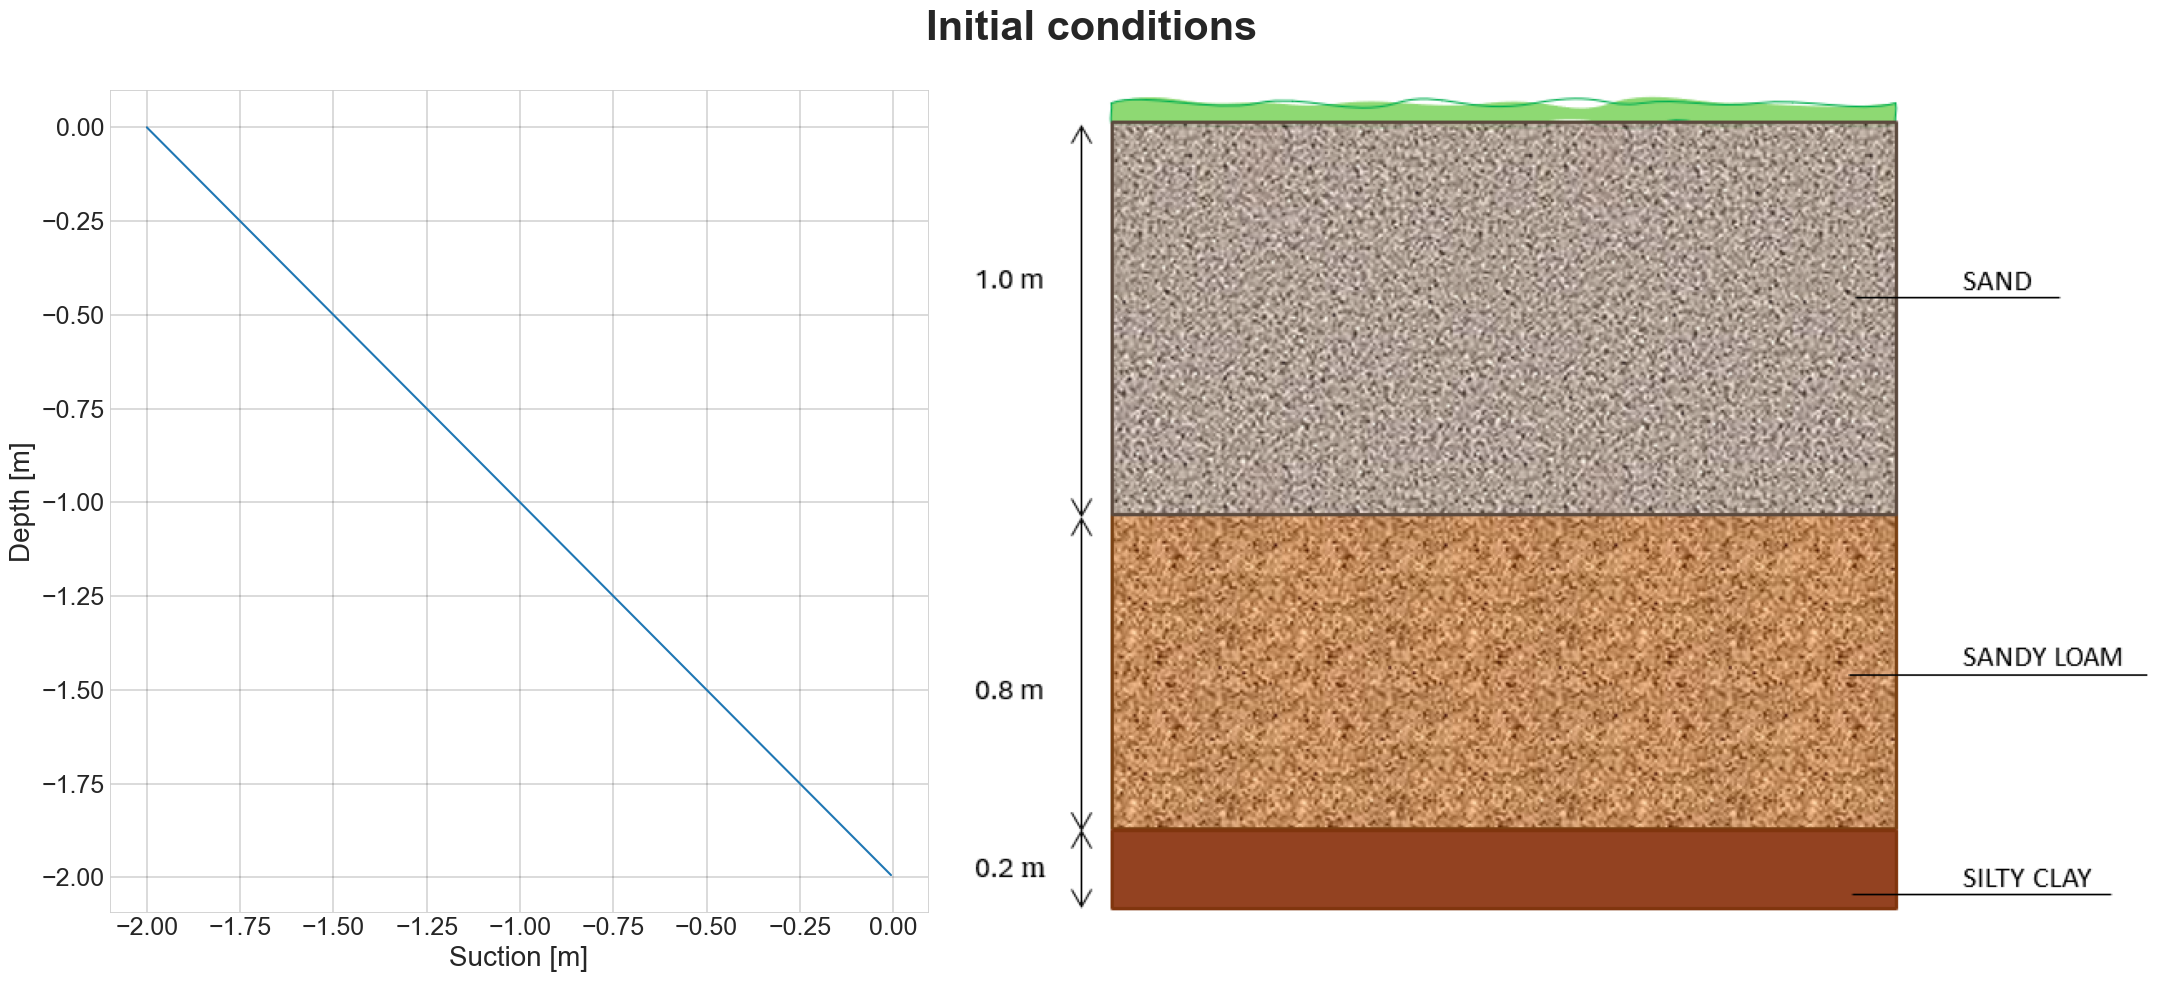

In [32]:
img_path = "C:/Users/bando/Pictures/Screenshots/grid4.png"
img = mpimg.imread(img_path)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 10), gridspec_kw={'width_ratios': [1, 1.5]})
ds2.psiIC.plot(y='depth', ax=ax[0])
ax[0].set_xlabel('Suction [m]', fontsize=20)
ax[0].set_ylabel('Depth [m]', fontsize=20)
ax[0].grid(color='black', linestyle='-', linewidth=0.2)
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].imshow(img)
ax[1].axis('off')
plt.tight_layout()

fig.suptitle("Initial conditions", fontweight = "bold", fontsize=30)
fig.subplots_adjust(top=0.9)
plt.show()

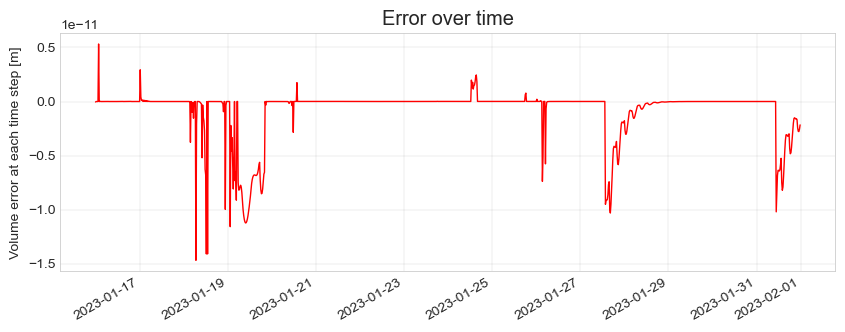

In [34]:
fig = plt.figure(figsize=(10,5/1.618))
ax = ds2.error.plot(linewidth=1, color='red')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]', fontsize=10) 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.1)

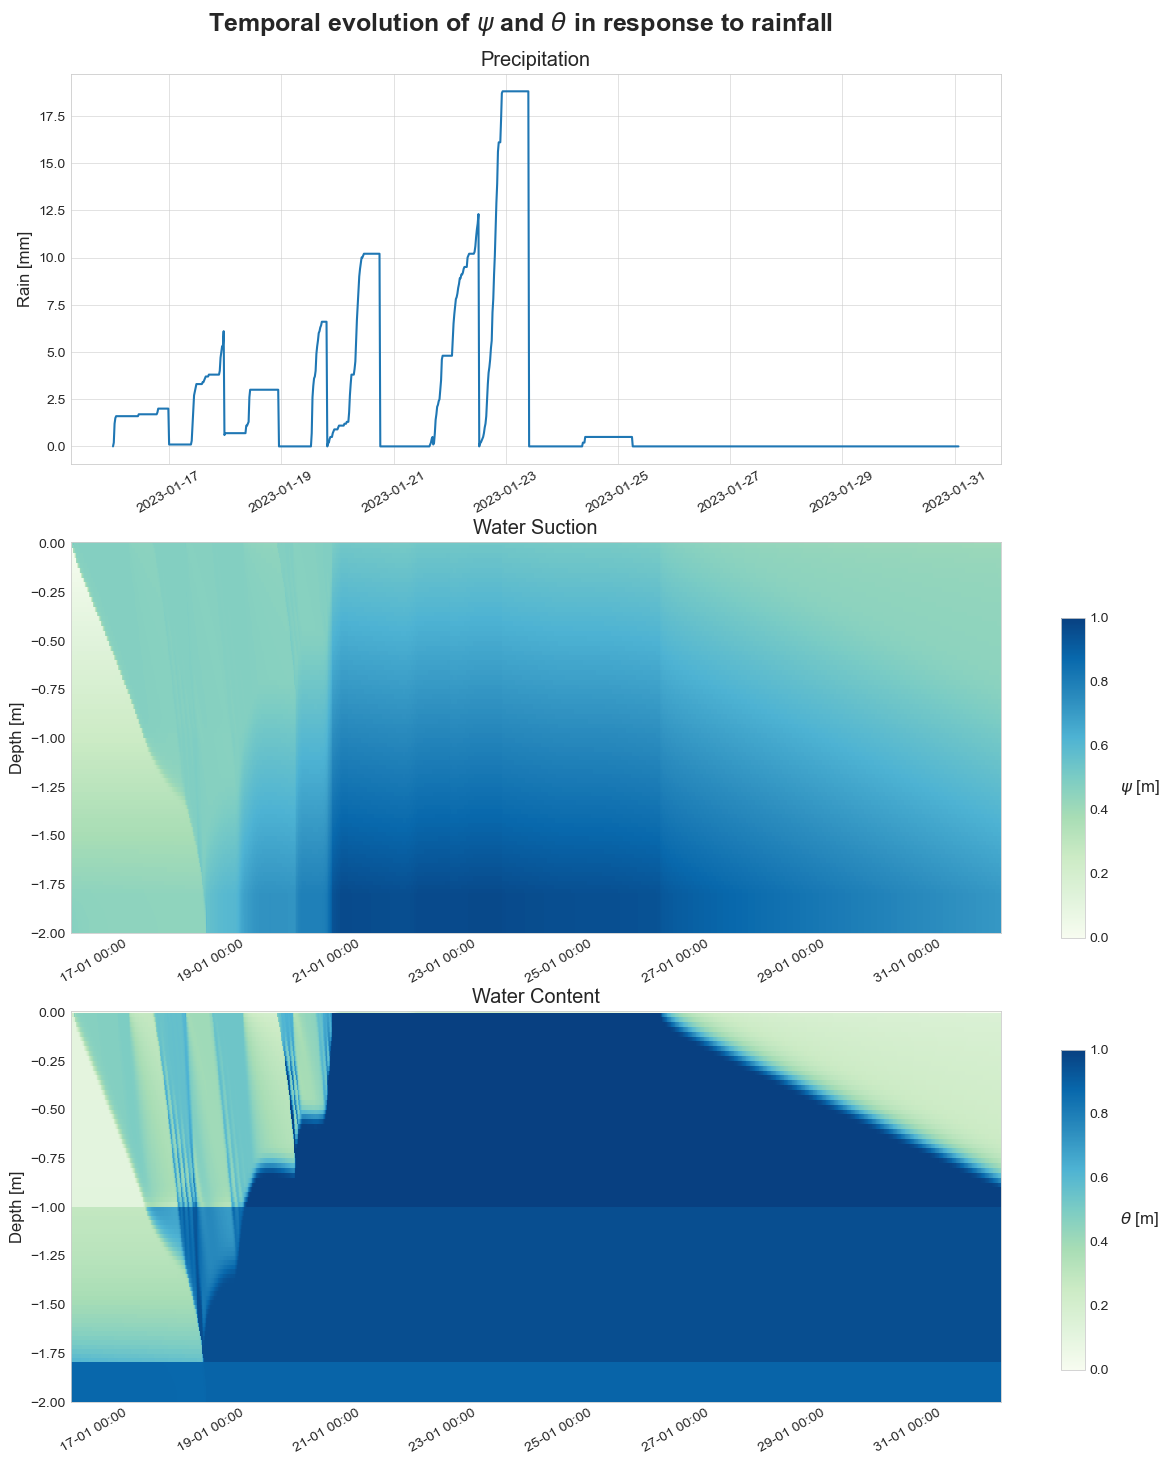

In [25]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/2_precipMedie_Forli.csv',datetime_index=False)
rain.head()
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 16)) 

ax[0].plot(ds2.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]')
ax[0].set_title('Precipitation')
ax[0].xaxis.set_tick_params(rotation=30)

ds2.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap='GnBu')
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('')
ax[1].set_title('Water Suction')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[1].xaxis.set_tick_params(rotation=30)
cbar_ax1 = fig.add_axes([0.95, 0.40, 0.02, 0.20])
sm1 = plt.cm.ScalarMappable(cmap='GnBu')
cbar1 = fig.colorbar(sm1, cax=cbar_ax1)
cbar1.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

ds2.theta.plot(ax=ax[2], y='depth', add_colorbar=False, cmap='GnBu')
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('')
ax[2].set_title('Water Content')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax[2].xaxis.set_tick_params(rotation=30)
cbar_ax2 = fig.add_axes([0.95, 0.13, 0.02, 0.20])
sm2 = plt.cm.ScalarMappable(cmap='GnBu')
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.set_label('$\\theta$ [m]', rotation=0, labelpad=22)

fig.suptitle("Temporal evolution of $\\psi$ and $\\theta$ in response to rainfall", fontweight = "bold", fontsize=18)
fig.subplots_adjust(top=0.94)
plt.show()

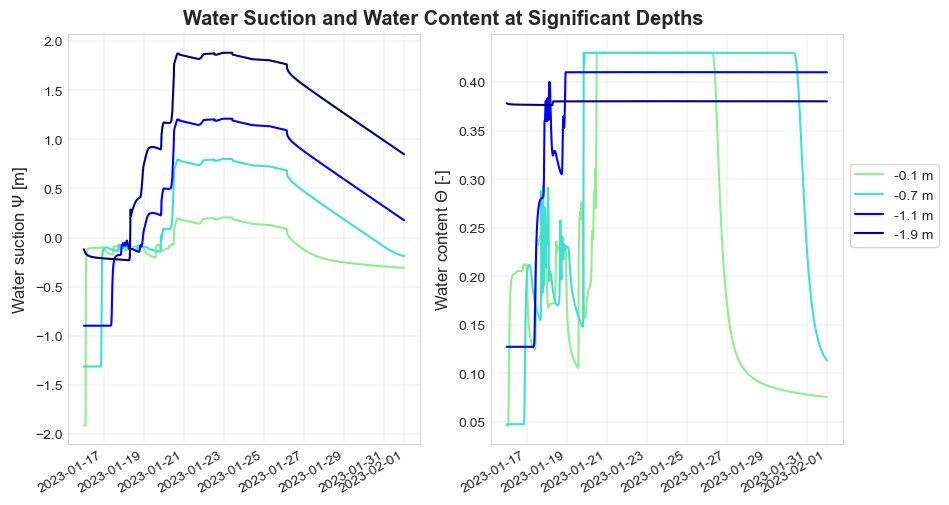

In [26]:
myDepth = [-0.1,-0.7,-1.1,-1.9]
colors = ['lightgreen', 'turquoise', 'blue', 'navy']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

for i in range(0, len(myDepth)):
    ds2.psi.sel(depth=myDepth[i], method='nearest', time=ds2.time.values[:]).plot(linewidth=1.5, label=str(myDepth[i])+' m',
                                                                                color=colors[i], ax=ax[0])
    ds2.theta.sel(depth=myDepth[i], method='nearest', time=ds2.time.values[:]).plot(linewidth=1.5, label=str(myDepth[i])+' m',
                                                                                  color=colors[i], ax=ax[1])

ax[0].set_ylabel('Water suction $\\Psi$ [m]')
ax[0].set_xlabel('')
ax[0].set_title('')
ax[0].grid(color='grey', linestyle='-', linewidth=0.1)

ax[1].set_ylabel('Water content $\\Theta$ [-]')
ax[1].set_xlabel('')
ax[1].set_title('')
ax[1].legend(bbox_to_anchor=(1,0.7))
ax[1].grid(color='grey', linestyle='-', linewidth=0.1)

fig.suptitle("Water Suction and Water Content at Significant Depths", fontweight = "bold")
fig.subplots_adjust(top=0.93)
plt.show()

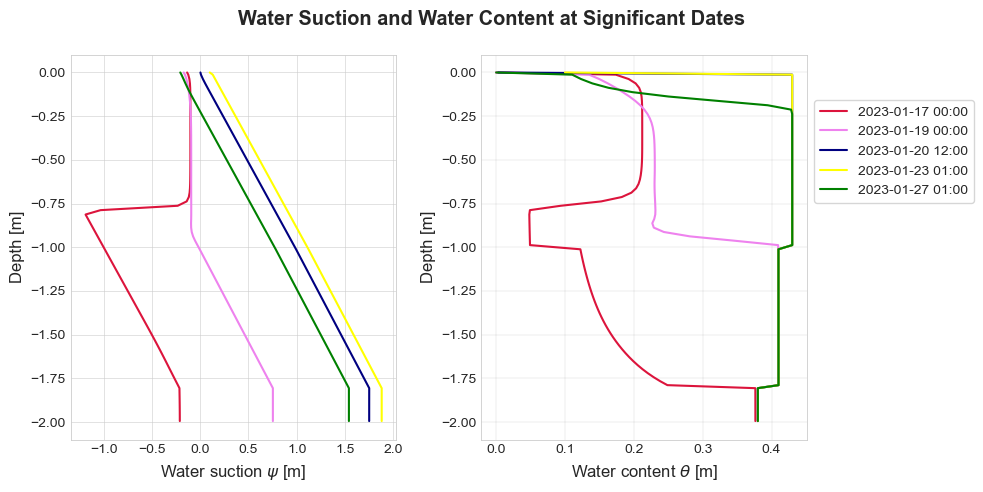

In [27]:
myDate = ['2023-01-17 00:00','2023-01-19 00:00', '2023-01-20 12:00','2023-01-23 01:00', '2023-01-27 01:00']
colors = ['crimson', 'violet', 'navy', 'yellow', 'green']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

for i in range (0,len(myDate)):
    ds2.psi.sel(time=myDate[i]).plot(y='depth', linewidth=1.5, label=myDate[i],ax =ax[0], color=colors[i])
    ds2.theta.sel(time=myDate[i]).plot(y='depth', linewidth=1.5, label=myDate[i],ax =ax[1], color=colors[i])

ax[0].set_xlabel('Water suction $\\psi$ [m]')
ax[0].set_ylabel('Depth [m]')
ax[0].set_title('')
ax[0].set_ylim(-2.1, 0.1)

ax[1].set_xlabel('Water content $\\theta$ [m]')
ax[1].set_ylabel('Depth [m]')
ax[1].set_title('')
ax[1].set_ylim(-2.1, 0.1)

fig.suptitle('Water Suction and Water Content at Significant Dates', fontweight='bold')
plt.legend(bbox_to_anchor=(1,0.9))
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.tight_layout()

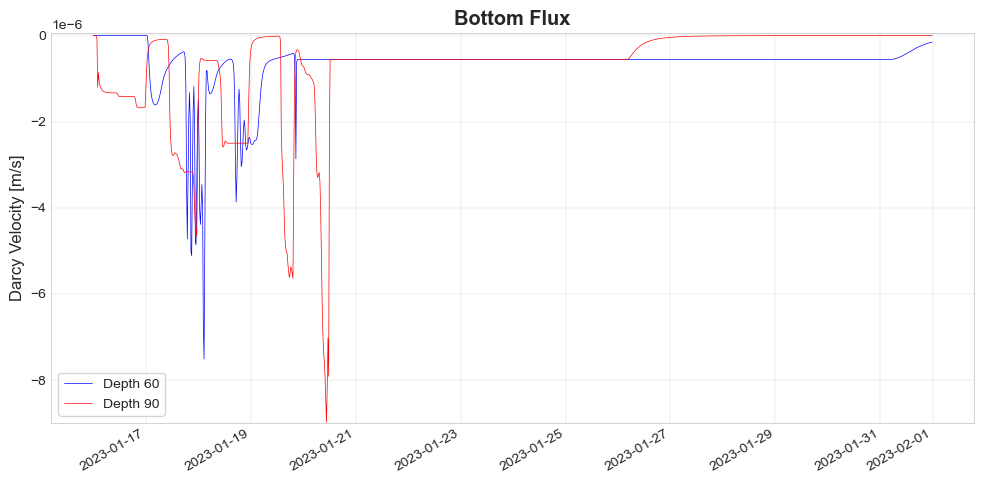

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
ds2.darcyVelocity.sel(dualDepth=ds2.dualDepth[60], time=ds2.time.values[:]).plot(linewidth=0.5, color='blue',
                                                                                    label='Depth 60', ax=ax)
ds2.darcyVelocity.sel(dualDepth=ds2.dualDepth[90], time=ds2.time.values[:]).plot(linewidth=0.5, color='red',
                                                                                label='Depth 90', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Darcy Velocity [m/s]')
ax.set_title('Bottom Flux', fontweight='bold')
ax.set_ylim(-0.000009, 0.00000005)

plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.legend()
plt.tight_layout()
plt.show()

- media di precipitazione: 1.66e-06 m/s
- Ks sabbia: 8.25e-05 m/s  

Prec < Ks -->  **Non si verifica deflusso hortoniano**.